# <b> BioE c149/249 HW 3

### <b> Overview

In this tutorial, we demonstrate how to process your own dataset for later analysis.

We review the following steps:

1. Loading your own data  
2. Filtering
3. Normalization
4. Transformation

We will then visualize results using dimensionality reduction techniques.

### <b> `scprep` Background

`scprep` is a lightweight scRNA-seq toolkit for Python Data Scientists.

Most scRNA-seq toolkits are written in R (the most famous being [Seurat](https://satijalab.org/seurat/)), but the community is also actively developing tools in Python. Currently, [Scanpy](https://icb-scanpy.readthedocs-hosted.com/en/stable/) is the most popular toolkit for scRNA-seq analysis in Python. However, Scanpy has a highly structured framework for data representation that is incompatible with the bulk of the Python data science framework, e.g. [pandas](https://pandas.pydata.org/), [SciPy](https://www.scipy.org/), and [scikit-learn](https://scikit-learn.org/stable/).

In this class we'll be using a set of tools developed by Prof. Smita Krishnaswamy at Yale.
Her group developed `scprep` (<b>s</b>ingle <b>c</b>ell <b>prep</b>aration) to accommodate users of the wider Python data analysis ecosystem. `scprep` makes it easier to use the pandas / SciPy / scikit-learn ecosystem for scRNA-seq analysis. Most of `scprep` is composed of helper functions to perform tasks common to single cell data like loading counts matrices, filtering & normalizing cells by library size, and calculating common statistics. The key advantage of `scprep` is that data can be stored in Pandas DataFrames, NumPy arrays, Scipy sparse matrices, and no matter which tools you choose to interface with, _it just works_.

To learn more about `scprep`, you can read the documentation at https://scprep.readthedocs.io/.

For this assignment, we will be working with a matrix. There are different conventions as to what rows and columns can represent. In one convention, rows are cells and columns are genes/transcripts. In the other convention, rows are genes/transcripts and columns are cells. Always double check what convention a particular software uses!

### <b> 0. Installations, Package Import

In [ ]:
%%bash
# Run this everytime you restart your kernel or relaunch the server
pip install --no-deps scprep
pip install --no-deps umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import scprep, umap
import matplotlib.pyplot as plt
%matplotlib inline

### <b> 1. Loading and understanding your data

We use a toolkit for loading and manipulating single-cell data called `scprep`. The functions in [`scprep.io`](https://scprep.readthedocs.io/en/stable/reference.html#module-scprep.io) will automatically load most single-cell datasets into a Pandas DataFrame.


Let's load the data and create a single matrix that we can use for preprocessing, visualization, and analysis.

#### <b> Loading data (csv/tsv/txt)

Our data is stored in .csv files, meaning the gene expression values are stored in plain text separated by a special character, usually a comma (or a tab in the case of .tsv). You may also see a compressed version of these (most often `.csv.gz`), which do not need to be decompressed before loading with `scprep`.

In [ ]:
## Read in the MYELOID counts
## You should see a file 'Brain_Myeloid-counts.csv'
## Add the path to this file in the function below

myeloid_data = scprep.io.load_csv("/content/drive/MyDrive/Brain_Myeloid-counts.csv", cell_axis='row', sparse=True).transpose()

## NOTE: For future steps, we need the transposed version of the original Myeloid dataset
## which is why you see the call .transpose()

myeloid_data.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
O5.MAA000570.3_8_M.1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,151.0,0.0,7.0,36.0,0.0,0.0,0.0
C3.MAA000570.3_8_M.1.1,0.0,348.0,0.0,0.0,0.0,686.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F17.MAA000570.3_8_M.1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I17.MAA000570.3_8_M.1.1,0.0,0.0,0.0,0.0,0.0,13.0,206.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
K17.MAA000570.3_8_M.1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
myeloid_data.shape

(4762, 23433)

In [ ]:
!unzip -q /content/sample_data/Brain_Non-Myeloid-counts.csv.zip

In [ ]:
## Read in the NON-MYELOID counts
## You should see a file 'Brain_Non-Myeloid-counts.csv'
## Add the path to this file in the function below

non_mye_data = scprep.io.load_csv("/content/Brain_Non-Myeloid-counts.csv",
                           cell_axis='row', sparse=True).transpose()

display(non_mye_data.head())
print(non_mye_data.shape)

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
E19.MAA000538.3_8_M.1.1,0.0,162.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0
M6.MAA000538.3_8_M.1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P7.MAA000538.3_8_M.1.1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0
F5.MAA000538.3_8_M.1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M7.MAA000538.3_8_M.1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(5799, 23433)


Now, we can combine our datasets into a single combined data matrix. If you wish, you may first apply library size filtering to each batch individually, as described in a section below, but this is not strictly necessary.

#### <b> Combining batches

In [ ]:
## TO DO
## Fill the labels appropriately

data = [myeloid_data , non_mye_data ]
batch_labels = ["myeloid","non-myeloid"]

## This combines batches together into a single DataFrame
data, sample_labels = scprep.utils.combine_batches(data, batch_labels)

#### <b> Understanding the data matrix

How big is our matrix? We can find out with `data.shape`.

In [ ]:
data.shape
#this should return (10561, 23433)

(10561, 4930)

`data.columns` will print out the columns of the datafame 'data'

In [ ]:
data.columns

Index(['0610005C13Rik', '0610007C21Rik', '0610007L01Rik', '0610007N19Rik',
       '0610007P08Rik', '0610007P14Rik', '0610007P22Rik', '0610008F07Rik',
       '0610009B14Rik', '0610009B22Rik',
       ...
       'Zxdb', 'Zxdc', 'Zyg11a', 'Zyg11b', 'Zyx', 'Zzef1', 'Zzz3', 'a',
       'l7Rn6', 'zsGreen_transgene'],
      dtype='object', length=23433)

`data.index` will print the row indices of the dataframe 'data'

In [ ]:
data.index

Index(['O5.MAA000570.3_8_M.1.1_myeloid', 'C3.MAA000570.3_8_M.1.1_myeloid',
       'F17.MAA000570.3_8_M.1.1_myeloid', 'I17.MAA000570.3_8_M.1.1_myeloid',
       'K17.MAA000570.3_8_M.1.1_myeloid', 'M12.MAA000570.3_8_M.1.1_myeloid',
       'P16.MAA000570.3_8_M.1.1_myeloid', 'C4.MAA000570.3_8_M.1.1_myeloid',
       'F21.MAA000570.3_8_M.1.1_myeloid', 'I20.MAA000570.3_8_M.1.1_myeloid',
       ...
       'O17.B003728.3_56_F.1.1_non-myeloid',
       'O19.B003728.3_56_F.1.1_non-myeloid',
       'O18.B003728.3_56_F.1.1_non-myeloid',
       'P1.B003728.3_56_F.1.1_non-myeloid',
       'P3.B003728.3_56_F.1.1_non-myeloid',
       'P2.B003728.3_56_F.1.1_non-myeloid',
       'P4.B003728.3_56_F.1.1_non-myeloid',
       'P5.B003728.3_56_F.1.1_non-myeloid',
       'P6.B003728.3_56_F.1.1_non-myeloid',
       'P7.B003728.3_56_F.1.1_non-myeloid'],
      dtype='object', length=10561)

Note that some tools expect the opposite: that genes would be on the rows and cells on the columns. Keep this difference in mind when you try new tools.

#### <b> Creating the metadata matrix

Often, there is additional information associated with our cells which we want to retain (e.g. batch, library size, cluster number, etc.) Here we create a metadata DataFrame to store this information.

In [ ]:
lookup = pd.Series(data.index).apply(lambda x: x.split('.')[1])

## TO DO
## fill in the path to metadata_FACS.csv below
metadata = pd.read_csv("/content/drive/MyDrive/metadata_FACS.csv", index_col=0).loc[lookup.values].reset_index()
metadata.index = data.index

#check out what your metadata looks like using head():
# The data for this homework is from Tabula Muris
# Learn more about the data here - https://tabula-muris.sf.czbiohub.org !
# Not for submission: What is FACS selection?
metadata.head()

,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex
O5.MAA000570.3_8_M.1.1_myeloid,MAA000570,3_8_M,Brain_Myeloid,Cerebellum,Microglia,M
C3.MAA000570.3_8_M.1.1_myeloid,MAA000570,3_8_M,Brain_Myeloid,Cerebellum,Microglia,M
F17.MAA000570.3_8_M.1.1_myeloid,MAA000570,3_8_M,Brain_Myeloid,Cerebellum,Microglia,M
I17.MAA000570.3_8_M.1.1_myeloid,MAA000570,3_8_M,Brain_Myeloid,Cerebellum,Microglia,M
K17.MAA000570.3_8_M.1.1_myeloid,MAA000570,3_8_M,Brain_Myeloid,Cerebellum,Microglia,M


### <b> 2. Filtering your data

#### <b> Why we filter cells by library size </b>

In scRNA-seq the library size of a cell is the number of unique mRNA molecules detected in that cell. These unique molecules are identified using a random barcode incorporated during the first round of reverse transcription. This barcode is called a <b>U</b>nique <b>M</b>olecule <b>I</b>dentifier, and often we refer to the number unique mRNAs in a cell as the number of UMIs.

<b> Optional: </b> To read more about UMIs, you can take a look at [Smith *et al.* (2017)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5340976/)

Depending on the method of scRNA-seq, the amount of library size filtering done can vary. The 10X Genomics CellRanger tool, the DropSeq and InDrops pipelines, and the Umitools package each have their own method and cutoff for determining real cells from empty droplets. Additional methods exist for trying to detect the difference between droplets containing one cell and droplets containing two cells ("doublets"). You can take these methods at face value or set some manual cutoffs based on your data.

#### <b> Visualing the library size distribution using `scprep` </b>

There is a helper function for plotting library size from a gene expression matrix in scprep called [`scprep.plot.plot_library_size()`](https://scprep.readthedocs.io/en/stable/reference.html#scprep.plot.plot_library_size).

In this sample, we see that there is a small number of cells with very small library sizes and a long tail of cells that have very high library sizes.

<Axes: title={'center': 'Library size before filtering'}, xlabel='Library size', ylabel='Number of cells'>

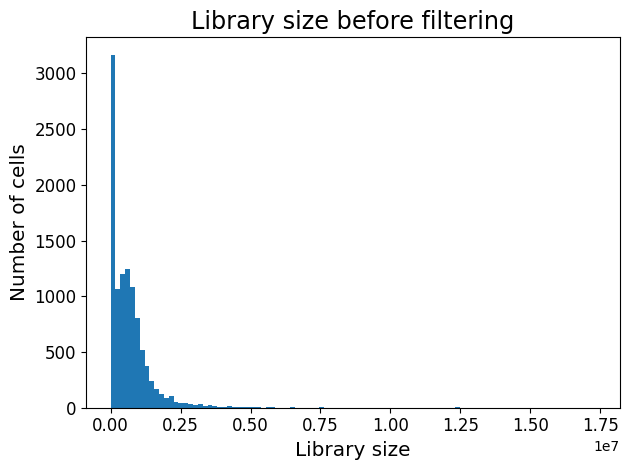

In [ ]:
## TODO ##
# Read the documentation by clicking on the link above,
# and call the method, scprep.plot.plot_library_size()
# you will need to pass 3 parameters to the method:
# the dataframe containing your data, log=False, and an appropriate title
# template code is shown below
scprep.plot.plot_library_size(data, log=False, title='Library size before filtering')

Choose cutoffs above and below the main bulk of cells, removing cells that are both significantly smaller than average and significantly larger than average. You can plot the result by running `scprep.plot.plot_library_size` with `cutoff=(low, high)` or `percentile=(low, high)` where low and high are values or percentiles that you choose.

<Axes: xlabel='Library size', ylabel='Number of cells'>

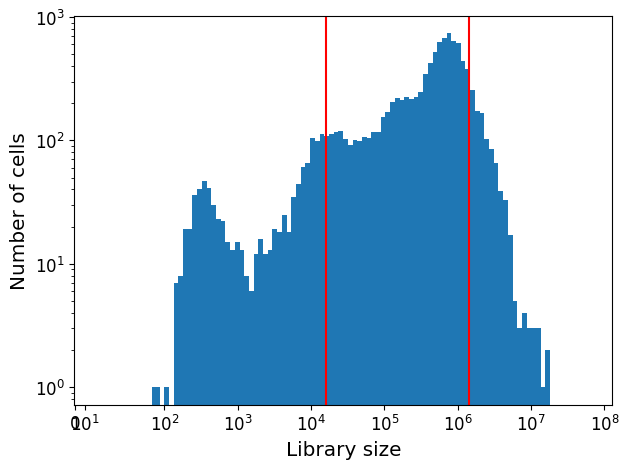

In [ ]:
## TODO ##
## Select appropriate percentiles (percentile=(low, high))
## low should **probably** be something between 0 and 30
## high should **probably** be something between 80 and 100

percentiles = (10,90) # ( ..select low.. , ..select high..  )

# here we call scprep.plot.plot_library_size again and also view
# where the cutoff for the percentiles that we picked will be

scprep.plot.plot_library_size(data, percentile=percentiles)

## This visualization will help you choose good high and low values
## try to play around with your percentile choices,
# then see how the graph changes when re-run!

## What made you select the percentiles that you did? Justify your answer briefly
NOTE: there is no one "correct" answer here, but please explain your choices

Answer: I just picked a good spread of what I think would be the lowest percentile but worth seeing in analysis. I consider 80 percent to be the least "high" percentile. Often 70% is an average but high-ish percentile, and what I think is a good standard for visualization.


#### <b> Selecting a cutoff

Several papers describe strategies for picking a maximum and minimum threshold that can be found with a quick google search for "library size threshold single cell RNA seq".

Most of these pick an arbitrary measure such as a certain number of deviations below or above the mean or median library size.


#### <b> Filtering cells by library size

You can do this using [`scprep.filter.filter_library_size()`](https://scprep.readthedocs.io/en/stable/reference.html#scprep.filter.filter_library_size).

In [ ]:
## TODO ##
# fill in your chosen `percentile` values
percentiles =  (20, 90)
data, metadata = scprep.filter.filter_library_size(data, metadata, percentile=percentiles)

The library size distribution is now much more constrained, which will reduce the effects of differences in library size (which can affect your results, even after normalization).

#### <b> Batch effects

It's worth noting here that if you have combined different experiments into one data matrix here, you are potentially exposed to a "batch effect". A batch effect is a difference (technical or biological) between two batches of an experiment. This can be caused by systematic error (e.g. a difference in temperature during library preparation) or a genuine biological effect of interest (e.g. in this case each batch is sampled at a different time of development.)

Any time we combine multiple experiments, we should check to see if they are substantially different and compare this to our expectations. If the effect is large and unexpected, we can either a) attempt to correct it / account for it using computational methods, or b) modify our analysis to avoid combining the datasets.

#### <b> Filtering lowly expressed genes

<b> Why remove lowly expressed genes?

Capturing RNA from single cells is a noisy process. The first round of reverse transcription is done in the presence of cell lysate. This results in capture of only 10-40% of the mRNA molecules in a cell leading to a phenomenon called dropout where some lowly expressed genes are not detected in cells in which they are expressed [[1](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5561556/#CR13), [2](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5561556/#CR44), [3](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5561556/#CR64), [4](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5561556/#CR65)]. As a result, some genes are so lowly expressed (or expressed not at all) that we do not have sufficient observations of that gene to make any inferences on its expression.

Lowly expressed genes that may only be represented by a handful of mRNAs may not appear in a given dataset. Others might only be present in a small number of cells. Because we lack sufficient information about these genes, we remove lowly expressed genes from the gene expression matrix during preprocessing. Typically, if a gene is detected in fewer than very few cells, it gets removed.

Here, we can see that in the dataset, there are many genes that are detected in very few cells.

<Axes: title={'center': 'Gene capture before filtering'}, xlabel='# of cells with nonzero expression', ylabel='# of genes'>

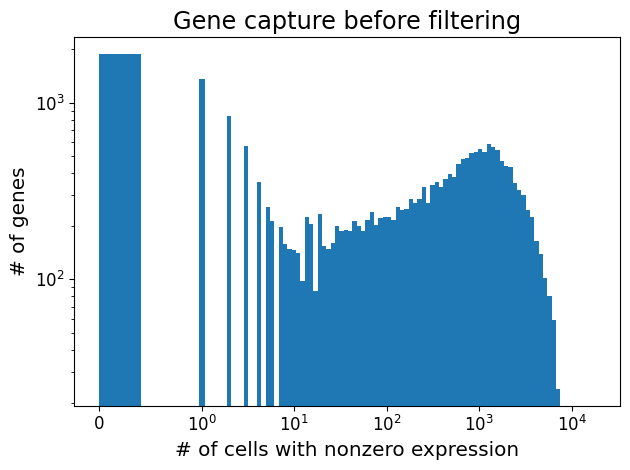

In [ ]:
scprep.plot.histogram(scprep.measure.gene_capture_count(data), log=True,
                      title="Gene capture before filtering",
                     xlabel='# of cells with nonzero expression',
                     ylabel='# of genes')

Again, we see a relatively clean distribution on the right (genes observed in many cells) with a heavy tail on the right (rare genes). Where would you choose to cut this off?

Depending on how stricts we want to be, we can probably set the threshold to at least 10 cells, but if we want to be safe and don't want to lose cells signal we can start with filtering out those that are not expressed in any cell and at least in two cells.

<Axes: title={'center': 'Gene capture before filtering'}, xlabel='# of cells with nonzero expression', ylabel='# of genes'>

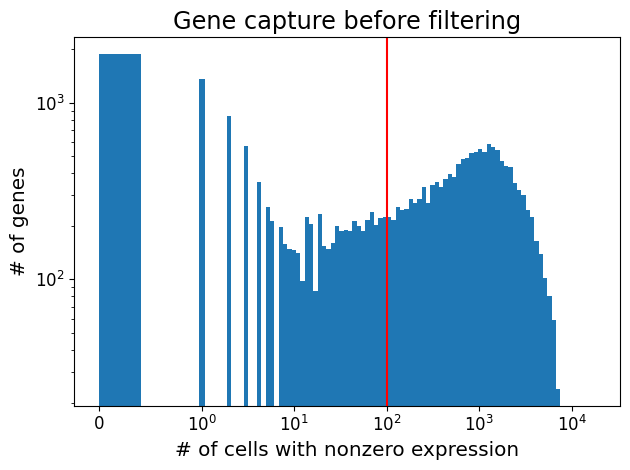

In [ ]:
#TODO
scprep.plot.histogram(scprep.measure.gene_capture_count(data),
                      cutoff = 100,
                      log=True,
                      title="Gene capture before filtering",
                     xlabel='# of cells with nonzero expression',
                     ylabel='# of genes')


Let's go ahead and remove those genes at cutoff 10.

In [ ]:
# TODO
cutoff = 10
data = scprep.filter.filter_rare_genes(data, min_cells=cutoff)

We can plot the above histogram again for good measure. As you can see, the rare genes are all gone.

In [ ]:
data.shape

(7391, 17459)

<Axes: title={'center': 'Gene capture before filtering'}, xlabel='# of cells with nonzero expression', ylabel='# of genes'>

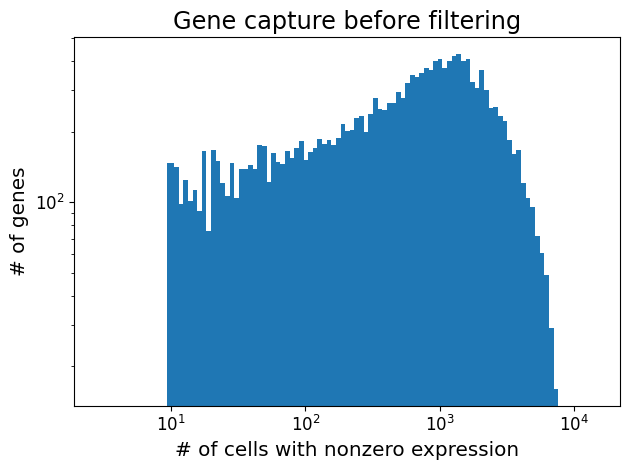

In [ ]:
## TODO ##
scprep.plot.histogram(scprep.measure.gene_capture_count(data),
                      log=True,
                      title="Gene capture before filtering",
                     xlabel='# of cells with nonzero expression',
                     ylabel='# of genes')




After filtering, we have removed many thousands of genes. This will be our last filtering step, though you can always filter out aberrant expression on an ad hoc basis. As it stands, we've quite significantly reduced our dataset from the ~ 10,000 x 33,000 that we started with. And that's not even counting the cells we removed by library size before combining time points!

### <b> 3. Normalization

As you saw during filtering, the range of library sizes between cells can be quite extreme. We will now normalize for it.

<Axes: title={'center': 'Library size before normalization'}, xlabel='Library size', ylabel='Number of cells'>

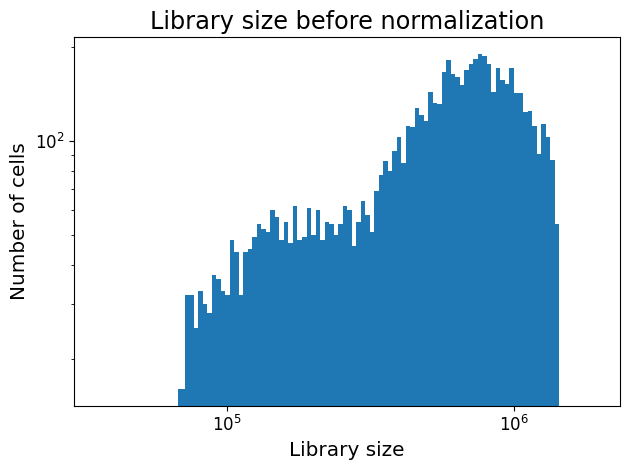

In [ ]:
scprep.plot.plot_library_size(data, title='Library size before normalization')

To correct for differences in library sizes, we divide each cell by its library size and then rescale by the a fixed value, sometimes the median library size. The default in `scprep` is to rescale every cell to 10,000 counts to make numbers comparable across datasets.

In python this is performed using the preprocessing method [`scprep.normalize.library_size_normalize()`](https://scprep.readthedocs.io/en/stable/reference.html#scprep.normalize.library_size_normalize).

In [ ]:
data, metadata['library_size'] = scprep.normalize.library_size_normalize(data, return_library_size=True)

If you plot the library sizes again, you'll see they are all the same.

<Axes: title={'center': 'Library size after normalization'}, xlabel='Library size', ylabel='Number of cells'>

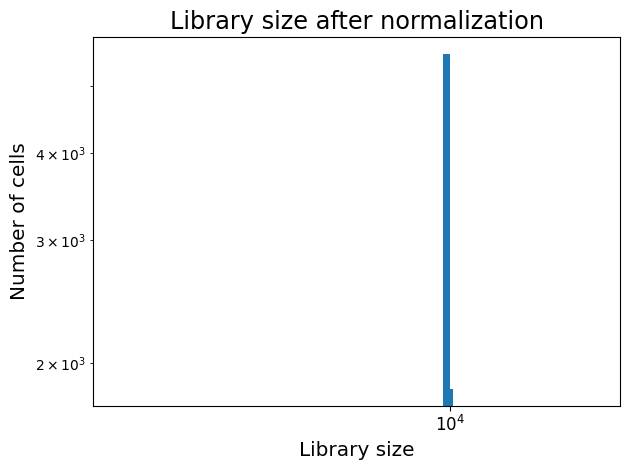

In [ ]:
scprep.plot.plot_library_size(data, title='Library size after normalization')

### <b> 4. Gene Count Transformation

In scRNA-seq analysis, we often see that some genes are orders of magnitude more common than others. Let's take a look at the mean expression of each gene.

<Axes: title={'center': 'Mean Expression of Genes'}, xlabel='Number of Cells ', ylabel='Number of Genes '>

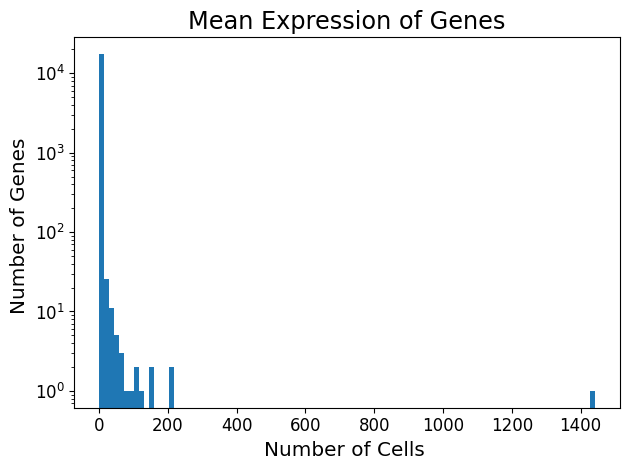

In [ ]:
## TODO
## fill the labels and figure title appropriately

scprep.plot.histogram(data.mean(axis=0), log='y',
                      title= "Mean Expression of Genes",
                     xlabel= "Number of Cells ",
                     ylabel= "Number of Genes ")

In order to avoid these high-expression genes dominating the variation, the data is often $\log$-transformed. This typically requires the addition of some small value to avoid taking $\log(0)$. We avoid this issue entirely by instead taking the square root transform. The square root function has a similar form as the $\log$ function with the added benefit of being stable at 0.

In [ ]:
data = scprep.transform.sqrt(data)

After transformation, you should see that the mean expression values are now much closer together.

<Axes: title={'center': 'Mean Expression of Genes'}, xlabel='Number of Cells ', ylabel='Number of Genes '>

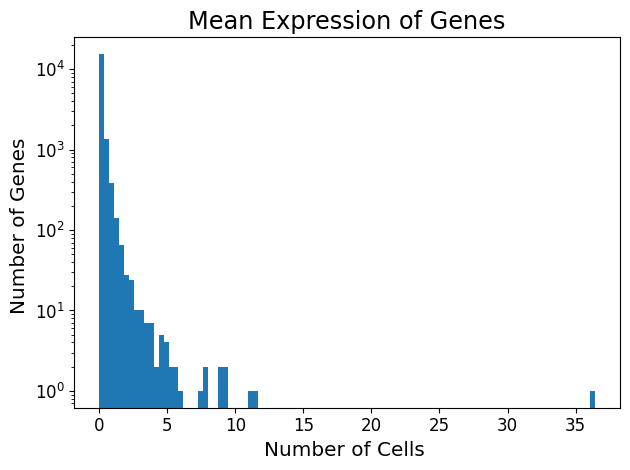

In [ ]:
## TODO
## fill the labels and figure title appropriately

scprep.plot.histogram(data.mean(axis=0), log='y',
                   title= "Mean Expression of Genes",
                     xlabel= "Number of Cells ",
                     ylabel= "Number of Genes ")

### <b> 5. Saving the output

There are many ways to save a Pandas DataFrame, including built in `pandas` function [`DataFrame.to_csv`](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#writing-out-data) and `scprep` function [`scprep.io.save_mtx`](https://scprep.readthedocs.io/en/stable/reference.html#scprep.io.save_mtx). For speed, we will be using [`DataFrame.to_pickle`](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#pickling) which is extremely fast and efficient for reading and writing matrices in Python.

The next cell will write the processed data matrices to disk.

**It will be helpful if you save the data at this point. If you decide to work on this notebook in parts you don't have to do the first half again, but may need to reimport some of the libraries**

***IMPORTANT: If you are using Google Colab, make sure to download this to your own computer or drive as Colab deletes files at the end of runtime!***

In [ ]:
## TO DO
## Save the data and metadata dataframes into pickle.gz files you can open later
data.to_pickle("data.pickle.gz") #file.pickle.gz
metadata.to_pickle("metadata.pickle.gz")  #file.pickle.gz

### <b> Summary

To summarize, we've preprocessed our data as follows:
1. Combine batches
2. Filter by library size to remove empty droplets and doublets
3. Filter out rarely expressed genes
4. Normalize by library size
5. Square root transform
6. Save and download our filtered data

### <b> 6. Principle Components Analysis (PCA) and UMAP

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scprep
%matplotlib inline

import umap
import os

In [ ]:
## load saved data, fill in with the paths to the appropriate pickle files you chose above
data = pd.read_pickle('data.pickle.gz')
metadata = pd.read_pickle('metadata.pickle.gz')

Here we're going to use the simplest dimensionality reduction method first. We don't expect PCA to work well because the dataset is so complex, but it's a good place to start with any dataset.

For this we are going to use the helper function:
[`scprep.reduce.pca()`](https://scprep.readthedocs.io/en/stable/_modules/scprep/reduce.html).

#### <b> Running PCA on the data

In [ ]:
# Let's run PCA on our data here
# Read the documentation linked above (click on scprep.reduce.pca()) and call the
# scprep.reduce.pca() method here and assign it to a name, data_pca

# we only need to pass 3 parameters to this method:
# the dataframe containing our data,
# n_components(the number of principal components), let's go with 50
# and method='dense'
# For example: scprep.reduce.pca(dataframe, n_components=50, method='dense')

# TODO

data_pca = scprep.reduce.pca(data, n_components=50, method='dense')

In [ ]:
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
O5.MAA000570.3_8_M.1.1_myeloid,24.748702,-2.676574,0.094319,3.097129,13.736627,0.176790,1.735585,1.249059,0.609462,0.849512,...,0.614770,-0.311475,-3.094819,-3.964076,-1.045044,0.485194,2.322707,-1.096966,0.249089,0.425346
C3.MAA000570.3_8_M.1.1_myeloid,21.396269,0.956230,-0.376137,4.310150,11.069028,-1.072790,2.392380,-1.096268,-1.081627,4.192542,...,3.151539,1.814517,3.136995,-0.289281,2.904011,1.779274,-0.289687,0.699942,-3.288555,-1.238541
F17.MAA000570.3_8_M.1.1_myeloid,23.265939,5.947320,-0.614041,1.974378,9.532150,-0.938259,4.309894,-0.212413,-3.449439,6.118436,...,-1.544387,1.225203,-2.118174,-1.725411,0.457542,0.764751,4.942359,-0.907259,1.891953,0.558588
I17.MAA000570.3_8_M.1.1_myeloid,20.467854,-0.019508,-0.942810,4.653882,14.905129,-1.413025,1.492941,0.518518,-0.145786,3.280508,...,1.328942,2.078230,-2.596108,-0.330938,-0.667946,1.392478,2.032719,0.578451,-0.122164,-1.656108
K17.MAA000570.3_8_M.1.1_myeloid,18.364320,9.869131,2.350851,0.104258,5.417307,-0.548785,5.936195,-2.211190,-4.351175,6.434849,...,-0.935911,-0.160692,0.885508,1.471587,-0.218291,-1.305713,4.558877,-0.711052,2.864687,-4.667906


#### <b> Plotting PCs using `scprep.plot`

The scprep package has a number of handy plotting features that act as a wrapper to `matplotlib`. You should know how to use `matplotlib` for more complicated plotting, but you can make all the plots we need in this tutorial with some help from `scprep`.

The full documentation of `scprep.plot` can be found here:

https://scprep.readthedocs.io/en/stable/reference.html#module-scprep.plot

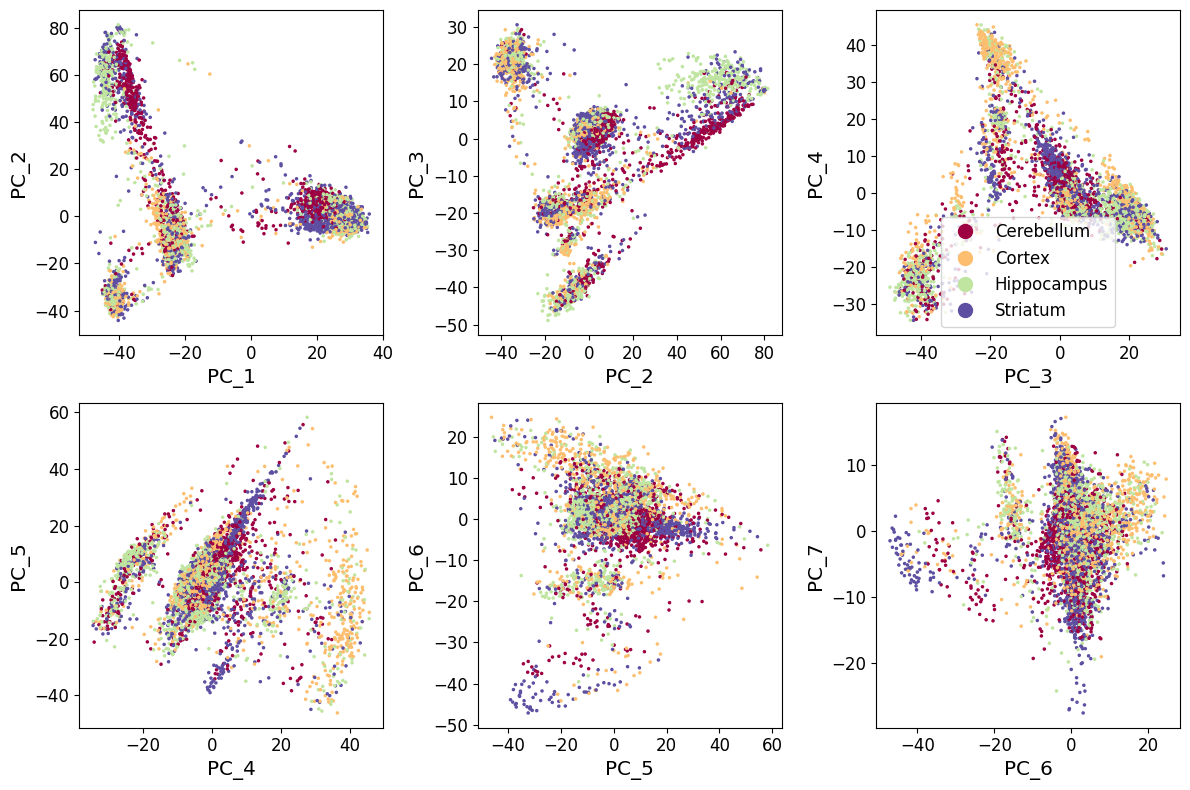

In [ ]:
# Let's explore what the different PCs show us!
# We will color our points based on the value in the 'subtissue' column in our metadata

fig, axes = plt.subplots(2,3, figsize=(12,8))
# This makes it easier to iterate through the axes
axes = axes.flatten()

for i, ax in enumerate(axes):
    # only plot a legend on one axis
    legend = True if i == 2 else False
    # There are a lot of parameters here, you can find the full scatter documentation at
    # https://scprep.readthedocs.io/en/stable/reference.html#scprep.plot.scatter
    scprep.plot.scatter(data_pca.iloc[:,i], data_pca.iloc[:,i+1], c=metadata['subtissue'],
                        cmap='Spectral', ax=ax,
                        xlabel="PC_" + str(i+1), ylabel="PC_" + str(i+2), legend=legend)
fig.tight_layout()

Let's explore more ways of visualizing our PC plots! Our metadata file can help us here.

In [ ]:
metadata.head()

,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex,library_size
O5.MAA000570.3_8_M.1.1_myeloid,MAA000570,3_8_M,Brain_Myeloid,Cerebellum,Microglia,M,732851.0
C3.MAA000570.3_8_M.1.1_myeloid,MAA000570,3_8_M,Brain_Myeloid,Cerebellum,Microglia,M,777301.0
F17.MAA000570.3_8_M.1.1_myeloid,MAA000570,3_8_M,Brain_Myeloid,Cerebellum,Microglia,M,553410.0
I17.MAA000570.3_8_M.1.1_myeloid,MAA000570,3_8_M,Brain_Myeloid,Cerebellum,Microglia,M,717128.0
K17.MAA000570.3_8_M.1.1_myeloid,MAA000570,3_8_M,Brain_Myeloid,Cerebellum,Microglia,M,479074.0


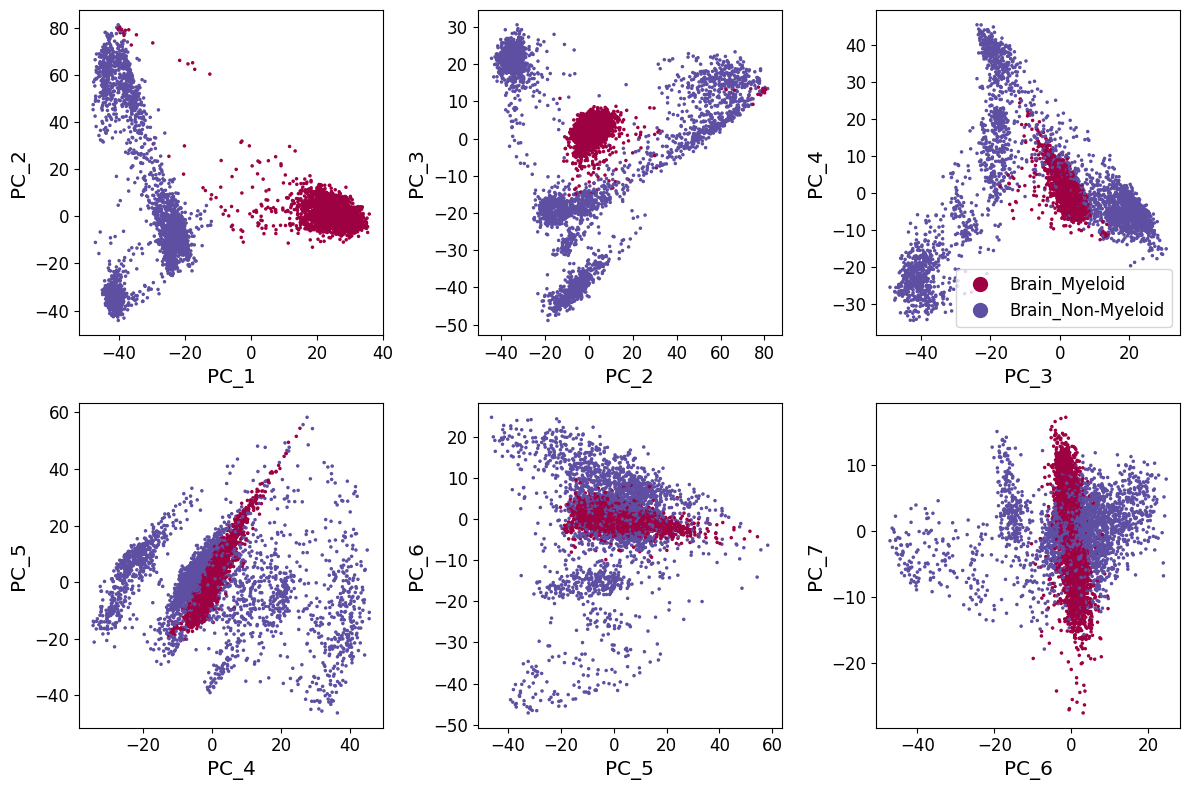

In [ ]:
# TODO
# Let's color our points based on the value in the 'tissue' column in our metadata

# Create a PCA plot like above and color the data based on
# the tissue column of your metadata file

# Hint: You can simply reuse the code we have above, you need to
# change the parameter c, c=metadata[?]

fig, axes = plt.subplots(2,3, figsize=(12,8))
# This makes it easier to iterate through the axes
axes = axes.flatten()

for i, ax in enumerate(axes):
    # only plot a legend on one axis
    legend = True if i == 2 else False
    # There are a lot of parameters here, you can find the full scatter documentation at
    # https://scprep.readthedocs.io/en/stable/reference.html#scprep.plot.scatter
    scprep.plot.scatter(data_pca.iloc[:,i], data_pca.iloc[:,i+1], c=metadata['tissue'],
                        cmap='Spectral', ax=ax,
                        xlabel="PC_" + str(i+1), ylabel="PC_" + str(i+2), legend=legend)
fig.tight_layout()


TODO

What do you think the first two PCs represent?

Answer: These two graphs display the strongest variance in the data. This is shown with the spread or space between colored regions. Variance is important because we are trying to see what components of the data set have large differences.

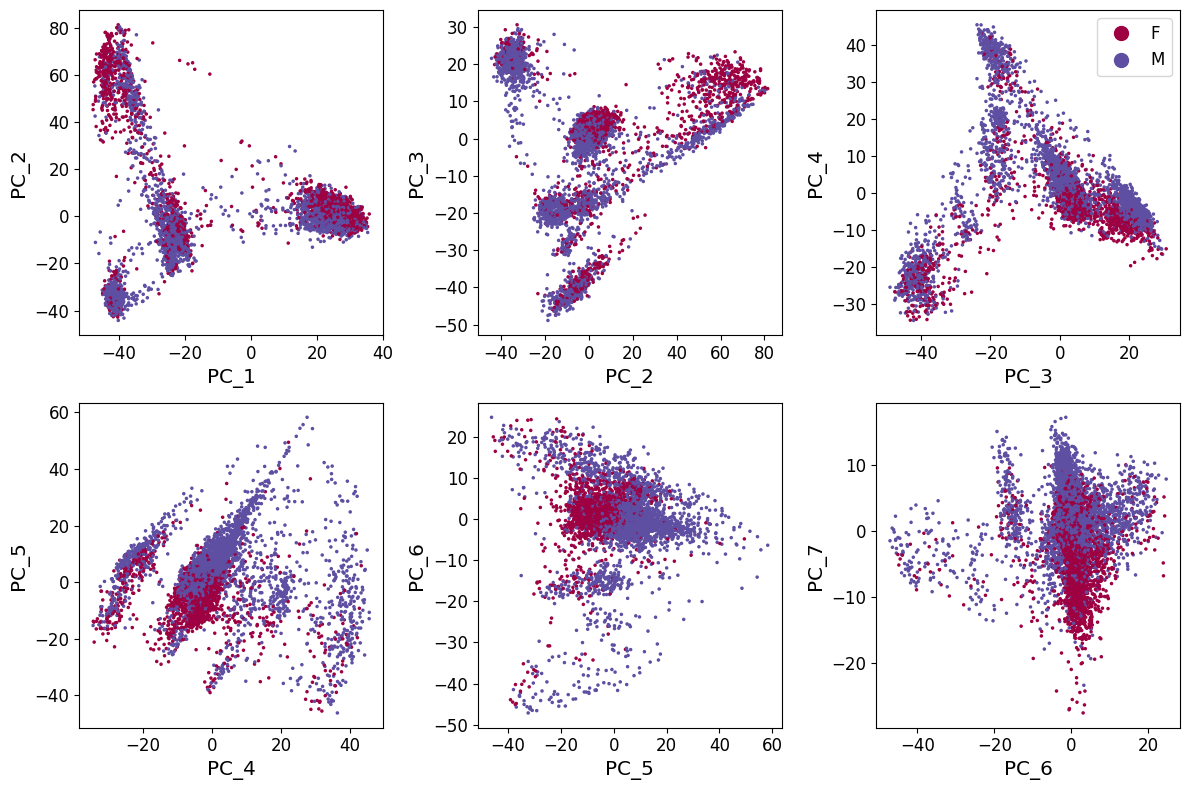

In [ ]:
# TODO
# Let's color our points based on the value in the 'mouse.sex' column in our metadata

# Create a PCA plot like above and color the data based on
# the mouse.sex column of your metadata file

# Hint: You can simply reuse the code we have above, you need to
# change the parameter c, c=metadata[?]
fig, axes = plt.subplots(2,3, figsize=(12,8))
# This makes it easier to iterate through the axes
axes = axes.flatten()

for i, ax in enumerate(axes):
    # only plot a legend on one axis
    legend = True if i == 2 else False
    # There are a lot of parameters here, you can find the full scatter documentation at
    # https://scprep.readthedocs.io/en/stable/reference.html#scprep.plot.scatter
    scprep.plot.scatter(data_pca.iloc[:,i], data_pca.iloc[:,i+1], c=metadata['mouse.sex'],
                        cmap='Spectral', ax=ax,
                        xlabel="PC_" + str(i+1), ylabel="PC_" + str(i+2), legend=legend)
fig.tight_layout()




#### <b> Plotting expression of a gene on the first two PCs

Now let's plot expression of some genes!


In [ ]:
data.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B22Rik,0610009D07Rik,0610009L18Rik,...,Zwilch,Zwint,Zxda,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,l7Rn6
O5.MAA000570.3_8_M.1.1_myeloid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.495597,0.0,0.0,0.0,1.435425,0.0,0.309059,0.70088,0.0
C3.MAA000570.3_8_M.1.1_myeloid,0.0,2.115899,0.0,0.0,0.0,2.970759,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F17.MAA000570.3_8_M.1.1_myeloid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.134424,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I17.MAA000570.3_8_M.1.1_myeloid,0.0,0.0,0.0,0.0,0.0,0.425768,1.694866,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
K17.MAA000570.3_8_M.1.1_myeloid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
scprep.select.select_cols(data.T, exact_word='Sp1')

/usr/local/lib/python3.12/dist-packages/scprep/select.py:454: UserWarning: Selecting 0 columns.
  warnings.warn("Selecting 0 columns.", UserWarning)


""
0610005C13Rik
0610007C21Rik
0610007L01Rik
0610007N19Rik
0610007P08Rik
...
Zyg11b
Zyx
Zzef1
Zzz3


In [ ]:
type(expression)

pandas.core.frame.DataFrame

In [ ]:
expression.sort_index().index

Index(['A1.B000826.3_39_F.1.1_myeloid', 'A1.B001176.3_56_F.1.1_myeloid',
       'A1.B003281.3_39_F.1.1_myeloid', 'A1.B003292.3_39_F.1.1_myeloid',
       'A1.B003728.3_56_F.1.1_non-myeloid',
       'A1.MAA000560.3_10_M.1.1_non-myeloid',
       'A1.MAA001854.3_38_F.1.1_non-myeloid', 'A10.B000825.3_38_F.1.1_myeloid',
       'A10.B003281.3_39_F.1.1_myeloid',
       'A10.MAA000564.3_10_M.1.1_non-myeloid',
       ...
       'P8.MAA000564.3_10_M.1.1_non-myeloid', 'P8.MAA000571.3_9_M.1.1_myeloid',
       'P8.MAA000590.3_9_M.1.1_myeloid', 'P8.MAA000605.3_10_M.1.1_myeloid',
       'P8.MAA000923.3_9_M.1.1_non-myeloid', 'P9.B003292.3_39_F.1.1_myeloid',
       'P9.MAA000564.3_10_M.1.1_non-myeloid', 'P9.MAA000571.3_9_M.1.1_myeloid',
       'P9.MAA000590.3_9_M.1.1_myeloid', 'P9.MAA000605.3_10_M.1.1_myeloid'],
      dtype='object', length=3169)

<Axes: title={'center': 'Sp1'}, xlabel='PC1', ylabel='PC2'>

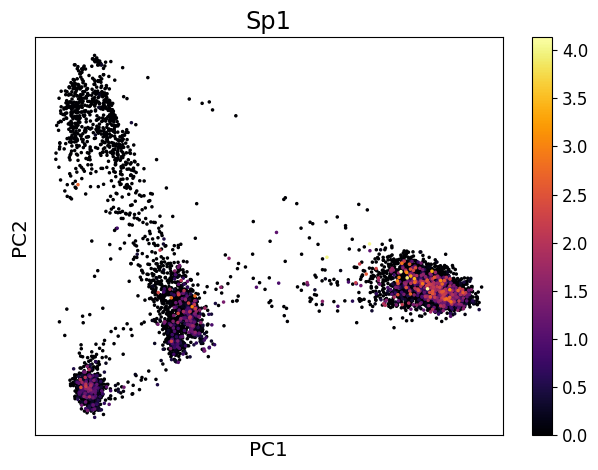

In [ ]:
## we have filled this in for you
expression = scprep.select.select_cols(data, exact_word='Sp1')

# we will sort cells by maximum expression so we can see where the gene is expressed
sort_index = expression.sort_values().index

scprep.plot.scatter2d(data_pca.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                      title='Sp1', ticks=None, label_prefix='PC')


<Axes: title={'center': 'Rn45s'}, xlabel='PC1', ylabel='PC2'>

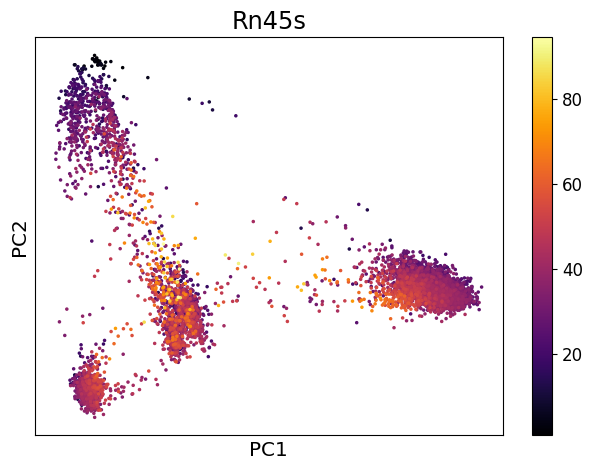

In [ ]:
## TO DO
## repeat the above but with gene 'Rn45s'

#Sort cells by maximum expression of Rn45s and plot the result on PCA
expression = scprep.select.select_cols(data, exact_word='Rn45s')
sort_index = expression.sort_values().index

scprep.plot.scatter2d(data_pca.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                      title='Rn45s', ticks=None, label_prefix='PC')

#### <b> Answer these questions!

TODO:
1. Based on your exploration of looking at different attributes from the metadata, what does the first principle component track? What about the second?

2. What do you think the higher PCs represent? What does that mean?

3. Why do you think we choose the first two PCs to plot gene expression on?

4. Look up the function of these two genes. What does it mean when a gene is expressed everywhere vs. in one region?

Answers:
1. The first and second principal components display the strongest variance of the data. We can see in scattered heat map plots where these genes show up with a sort in the highest concentration. We can see in other PCA's regarding tissue or mouse sex, where the placement in variance overlap.
2. The way these factors vary when compared to eachother is not as drastic. Higher PC's represent smaller differences, displaying noise like batch effects. This is still important data!
3. We want to see mostly where theyse genes are mostly expressed on the plots that give the most meaningful data, and then can compare them to other PCA plots we've made.
4. These genes are both expressed in many places, so we want to see where they are expressed most.We can do this with other genes in the data to see which parts of the mice display the most activity of these gene's functions. Both genes are active in cellular funcitons. Sp1 is a "regulator of housekeeping genes", and Rn45s "encodes 45s ribosomal RNA".

#### <b> Embedding Data Using UMAP

The syntax for UMAP is based on many sklearn packages: `umap.UMAP().fit_transform`. UMAP is relatively fast.

UMAP's `n_neighbors` parameter describes the size of the neighborhood around each point. The `min_dist` parameter describes how tightly points can be packed together. The authors recommend values between 2 and 200 for `n_neighbors`, and between 0 and 0.99 for `min_dist`.

If you would like, feel free to play around with the `min_dist` and `n_neighbors` parameters.

In [ ]:
import umap.umap_ as umap
data_umap = umap.UMAP().fit_transform(data_pca.iloc[:,:50])

In [ ]:
data_umap = pd.DataFrame(data_umap, index = data.index)

In [ ]:
%matplotlib inline

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

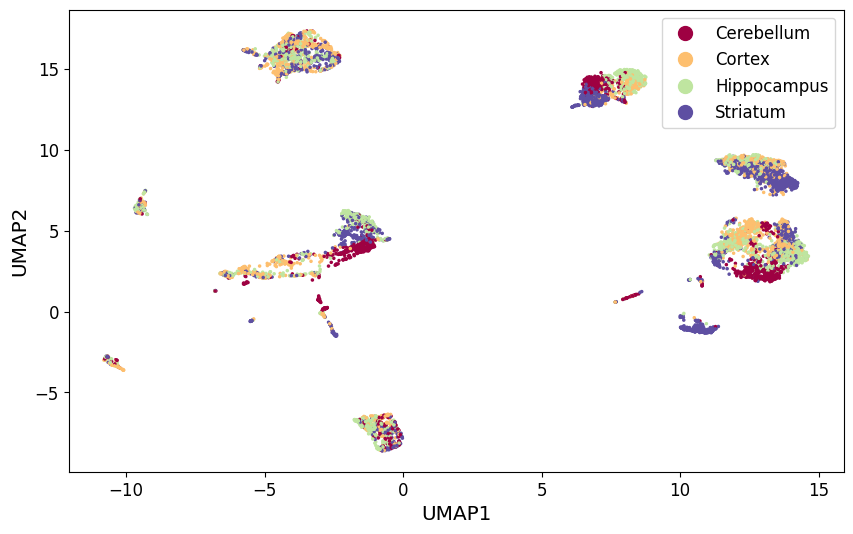

In [ ]:
# We will plot the UMAP coordinates
# **colored by subtissue**
fig, ax = plt.subplots(figsize=(10,6)) ## feel free to adjust size

scprep.plot.scatter2d(
  data_umap, cmap='Spectral',
  c=metadata['subtissue'], ax=ax,
  label_prefix="UMAP"
)

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

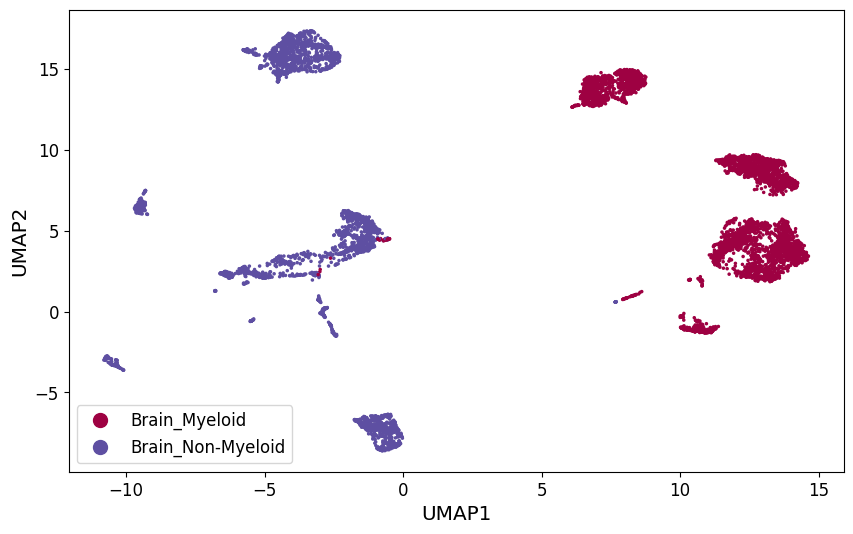

In [ ]:
## TO DO ##
# Try to change the coloring to 'tissue'
# and see what that looks like!

fig, ax = plt.subplots(figsize=(10,6)) ## feel free to adjust size

scprep.plot.scatter2d(
  data_umap, cmap='Spectral',
  c=metadata['tissue'], ax=ax,
  label_prefix="UMAP"
)


<Axes: xlabel='UMAP1', ylabel='UMAP2'>

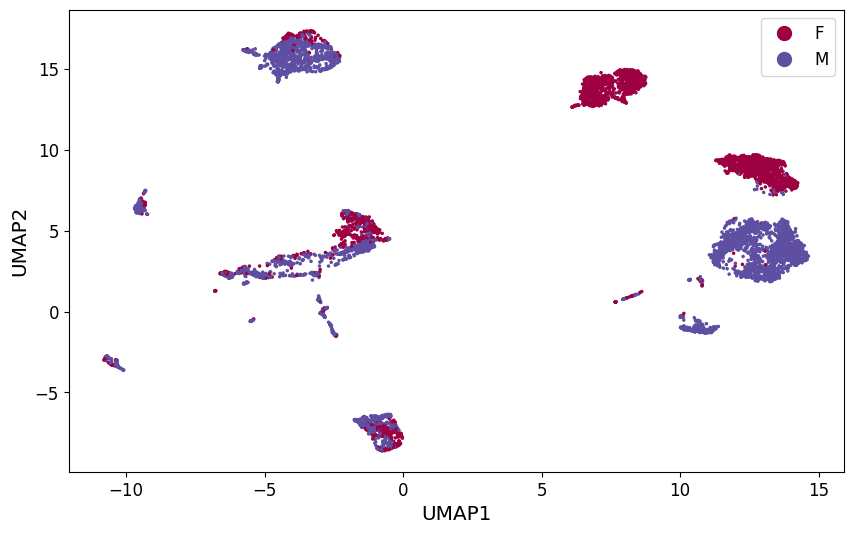

In [ ]:
## TO DO ##
# Try to change the coloring to 'mouse.sex'
# and see what that looks like!

fig, ax = plt.subplots(figsize=(10,6)) ## feel free to adjust size

scprep.plot.scatter2d(
  data_umap, cmap='Spectral',
  c=metadata['mouse.sex'], ax=ax,
  label_prefix="UMAP"
)


#### Let's look at some marker genes!

Sp1
Rn45s


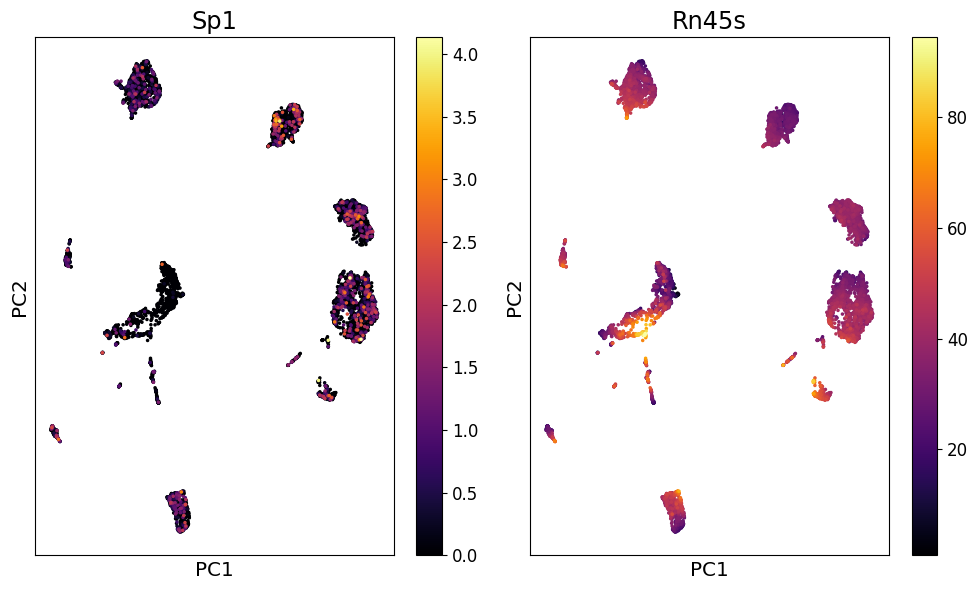

In [ ]:
## TODO ##

genes_for_plotting = ['Sp1', 'Rn45s']
# Plot two subplots of the UMAP coordinates
# coloring by Sp1 and Rn45s
fig, axes = plt.subplots(1, 2, figsize=(10,6))

for gene, ax in zip(genes_for_plotting, axes.flatten()):
    print(gene)
    expression = scprep.select.select_cols(data, exact_word=gene)
    sort_index = expression.sort_values().index

    scprep.plot.scatter2d(data_umap.loc[sort_index], c=expression.loc[sort_index],
                          shuffle=False, title=gene,
                          label_prefix='PC', ticks=None, ax=ax)

## HINT: this uses a for loop structure instead of manually indexed in the
## previous examples. The code should be similar to our PC plots.
## Be sure to use the gene variables as needed.
## We prefilled in some arguments for you
fig.tight_layout()


### Submission

TODO: Once you are finished, download this notebook as .ipynb (```File -> Download```). Zip the file, and then submit it to Gradescope!

DO NOT include any of the data files in your submission